In [11]:
setwd("/root/workspace/code/sc-transformer/eval/plot")
source("/root/workspace/code/sc-transformer/preprocess/utils.R")
library(tibble)
library(RColorBrewer)
library(dynutils)
library(stringr)
library(Hmisc)
library(plyr)
library(gdata)
library(scales)
library(reshape)


In [12]:
# data <- "dogma"
data <- "teadog"

outdir <- "../../paper/3"
mkdir(outdir, remove_old = F)

midas   <- as.data.frame(read.xls(paste0("data/scib_metrics_mosaic_", data, "_e0_sp_00001899_sorted.xlsx")))
scvaeit <- as.data.frame(read.xls(paste0("data/scib_metrics_mosaic_", data, "_scvaeit_sorted.xlsx")))
scmomat <- as.data.frame(read.xls(paste0("data/scib_metrics_mosaic_", data, "_scmomat_sorted.xlsx")))
stabmap <- as.data.frame(read.xls(paste0("data/scib_metrics_mosaic_", data, "_stabmap_sorted.xlsx")))
names(midas)[1] <- names(scvaeit)[1] <- names(scmomat)[1] <- names(stabmap)[1] <- "Method"

midas["Method"] <- "MIDAS"
scvaeit["Method"] <- "scVAEIT"
scmomat["Method"] <- "scMoMaT"
stabmap["Method"] <- "StabMap"

all <- rbind(midas, scvaeit, scmomat, stabmap)[c("Method", "Task", "overall_score")]
names(all) <- c("Method", "Task", "Overall score")

In [13]:

all[["Task"]] <- str_replace_all(all[["Task"]], c("_" = "-",
                                                "-paired-full" = "-paired+full",
                                                "-single-full" = "-diagonal+full",
                                                "-single$" = "-diagonal",
                                                "-single" = ""
                                                ))

all[["Method"]] <- factor(x = all[["Method"]], levels = c("StabMap", "scVAEIT", "scMoMaT", "MIDAS"))
all[["Task"]] <- factor(x = all[["Task"]], levels = paste0(data, c(
    "-full",
    "-paired+full",
    "-paired-abc",
    "-paired-ab",
    "-paired-ac",
    "-paired-bc",
    "-diagonal+full",
    "-diagonal")))
all

Method,Task,Overall score
<fct>,<fct>,<dbl>
MIDAS,teadog-full,0.7564007
MIDAS,teadog-paired-bc,0.7511078
MIDAS,teadog-paired-abc,0.7480685
MIDAS,teadog-paired+full,0.7448223
MIDAS,teadog-paired-ac,0.7371048
MIDAS,teadog-paired-ab,0.7125471
MIDAS,teadog-diagonal+full,0.6892555
MIDAS,teadog-diagonal,0.4899711
scVAEIT,teadog-full,0.6630788


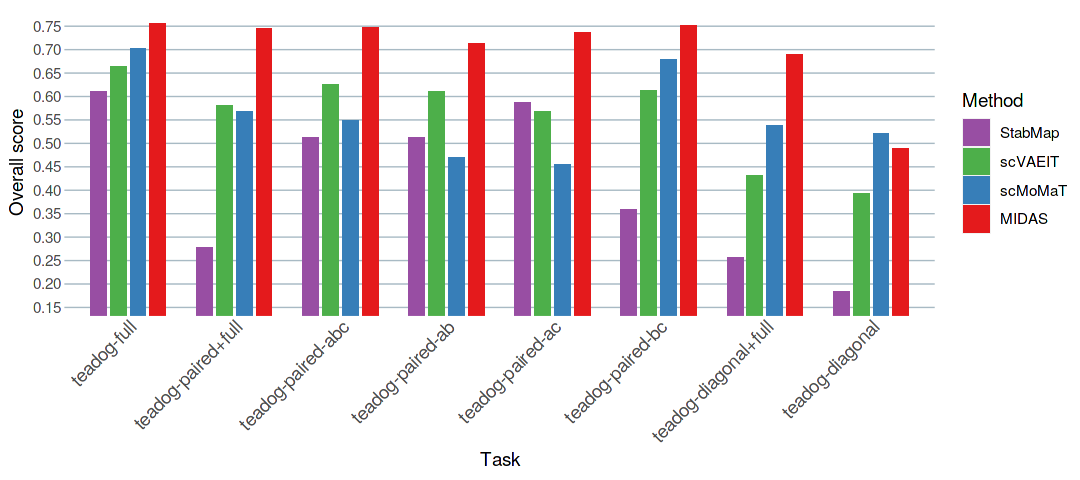

In [14]:
p <- ggplot(data = all, aes(x = .data[["Task"]],
                                 y = .data[["Overall score"]],
                                 fill = .data[["Method"]], width = 0.6)) +
geom_bar(stat = "identity", position = position_dodge(width = 0.6 + 0.15)) +
scale_fill_brewer(palette = "Set1", direction = -1) +
  scale_y_continuous(
    limits = c(min(all["Overall score"]) - 0.05, max(all["Overall score"]) + 0.03), oob = rescale_none,
    breaks = seq(0, 1, by = 0.05),
    expand = c(0, 0), # The vertical axis does not extend to either side
    # position = "top"  # Labels are located on the top
  ) +
  # scale_y_discrete(expand = expansion(add = c(0, 0.5))) +
  theme(
    panel.background = element_rect(fill = "white"), # Set background color to white
    panel.grid.major.y = element_line(color = "#A8BAC4", size = 0.3), # Set the color and the width of the grid lines for the horizontal axis
    panel.grid.major.x = element_blank(),
    axis.ticks.length = unit(0, "mm"), # Remove tick marks by setting their length to 0
    # axis.title = element_blank(), # Remove the title for both axes
    # axis.line.y.left = element_line(color = "black"), # Only left line of the vertical axis is painted in black
    # axis.text.y = element_blank(),
    axis.text.x = element_text(size = 11)
    # axis.text.x = element_text(family = "Econ Sans Cnd", size = 16)
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


w <- 9
h <- 4
plt_size(w, h)
p
ggsave(plot = p, file = pj(outdir, paste0("3c_mosaic_scib_score_", data, ".png")), width = w, height = h, limitsize = F)
ggsave(plot = p, file = pj(outdir, paste0("3c_mosaic_scib_score_", data, ".pdf")), width = w, height = h, limitsize = F)